**99Acres Property Price Prediction**

Inspired by the Boston dataset this notebook implements data mining , preprocessing, feature engineering and machine learning to predict house prices in this place called Hadapsar, Pune. Although with minor tweaks this can be used to mine data for any location on 99Acres.com

The EDA code has been removed...

This is a simple starter notebook which does not implement hyperparameter tuning.



Authored by: Rahul V

github: /rahul23aug

email: rahul.vanjerry@gmail.com

In [116]:
import numpy as np, pandas as pd
from bs4 import BeautifulSoup
import requests
import itertools

In [ ]:
#Utility Functions
dataset = pd.DataFrame([])
link = 'https://www.99acres.com/property-in-hadapsar-pune-ffid?src=CLUSTER'
class page_scraper():
  def __init__(self,link):
    self.link = link
    self.colnames = ['Link','Proj_name','Address', 'BHK','Property_type', 'Area','Area_type','Construction_status','Pocession','RERA_status', 'Extra', 'Basic_amenities','Lifestyle_ammenities','More_deets','Price']
    self.prop_links = []
    self.data_points =[]
    self.data_points2 = []
    self.prob = []
    self.link_mask = self.link.split('ffid')[0] + 'ffid-page-'
    self.page_count = 1
    self.link_count = 0
  def update_links(self):
    self.page_count += 1
    self.link = self.link_mask + str(self.page_count)

  def get_propertylinks(self,raw_link= None):
    if raw_link is None:
      response = requests.get(self.link)
    else:
      response = requests.get(raw_link)
    soup = BeautifulSoup(response.text, "html.parser")
    href = []
    test = soup.find_all('div', class_ ='pageComponent srpTuple__srpTupleBox srp')
    for i in test:
      text = i.find_all('a', class_ ="body_med srpTuple__propertyName",href=True)
      href.append(text[0]['href'])
    href = ['https://www.99acres.com' + i for i in href]
    for i in href:
      self.prop_links.append(i)
    return href

  def get_datapoints_v2(self,i):
    try:
      response = requests.get(i)
      soup = BeautifulSoup(response.text, "html.parser")
      price = soup.find_all('div', class_="component__pdMainDetail component__rentMainDetail pd__rentMainDetail")
      price = price[0].find_all('span', class_="component__pdPropValue")[0].text.strip()
      price
      try:
        area = soup.find_all( 'table',id="FactTableComponent", class_="component__factTable generic__listNone")
        area = area.pop(0)
        area= area.find_all('div', class_="component__details",id ='factArea')
        area=area.pop(0)
        area= area.find_all('span')
        area_type = area[0].get('id')
        area = area[0].text + ' sq.ft.'
        if 'super' in area_type:
          area_type = 'Super Built-up Area'
        elif 'carpet' in area_type:
          area_type = 'Carpet Area'
        else:
          area_type = 'Built-up Area'
      except:
        area_type = 'NA' 
        area = 'NA'
      try:
        floor = soup.find_all( 'table',id="FactTableComponent", class_="component__factTable generic__listNone")
        floor = floor.pop(0)
        floor= floor.find_all('tr')
        floor=floor.pop(2)
        floor= floor.find_all('span',  id="floorNumLabel")
        floor = floor.pop(0).text
        floor = floor.replace('\xa0\xa0', ' ').strip()
      except:
        floor  = 'NA'
      try:
        rera_status = soup.find_all('div', class_="component__reraWrap")
        rera_status = rera_status[0].find_all('span')
        rera_status = rera_status[1].text.strip()
      except:
        rera_status = 'NA'
      try:
        property_age = soup.find_all( 'table',id="FactTableComponent", class_="component__factTable generic__listNone")
        property_age = property_age.pop(0)
        property_age= property_age.find_all('tr')
        property_age = property_age[-1]
        property_age = property_age.find_all( 'span',id="agePossessionLbl").pop(0)
        property_age = property_age.text
      except:
        property_age  = 'NA'
      try:
        property_type = soup.find_all( 'div',class_="component__pdPropConfig")
        property_type = property_type.pop(0)
        property_type = property_type.find_all('div', class_="component__pdPropConfSide component__rentHeading pd__rentHeading", id="headerDescription").pop(0)
        property_type =property_type.text
        property_type = property_type.replace('for Sale', '')
        property_type = property_type.strip()
      except:
        property_type = 'NA'
      try:
        bhk = soup.find_all( 'div', class_ = 'component__pdPropConfig')
        bhk = bhk.pop(0)
        bhk = bhk.find_all('h1', id='bedWash')
        bhk = bhk.pop(0)
        bhk = bhk.text.split(' ')[0]
      except:
        bhk = 'NA'
      try:
        proj_name = soup.find_all( 'table',id="FactTableComponent", class_="component__factTable generic__listNone")
        proj_name = proj_name.pop(0)
        proj_name = proj_name.find_all('div', class_='component__details')
        proj_name = proj_name[3].text
      except:
        proj_name  = 'NA'
      try:
        sale_type = soup.find_all( 'span',id="Transact_Type_Label")
        sale_type = sale_type.pop(0)
        sale_type = sale_type.text
      except:
        sale_type  = 'NA'
      try:
        own_type = soup.find_all( 'span',id="Owntype_Label")
        own_type = own_type.pop(0)
        own_type = own_type.text
      except:
        own_type = 'NA'
      try:
        Furnished_type = soup.find_all( 'span',id="Furnish_Label")
        Furnished_type = Furnished_type.pop(0)
        Furnished_type = Furnished_type.text
      except:
        Furnished_type = 'NA'
      try:
        water_type = soup.find_all( 'span',id="Watersource_Label")
        water_type = water_type.pop(0)
        water_type = water_type.text
      except:
        water_type = 'NA'
      try:
        Powerbackup = soup.find_all( 'span',id="Powerbackup_Label")
        Powerbackup = Powerbackup.pop(0)
        Powerbackup = Powerbackup.text
      except:
        Powerbackup = 'NA'
        # create datapoints
      l = [i,proj_name,bhk,property_type, area,area_type,floor,rera_status,property_age,property_type,sale_type,own_type,Furnished_type,water_type,Powerbackup ,price]
      self.link_count +=1
      print('{}/{} link(s) processed '.format(self.link_count,len(self.prop_links)))
      self.data_points2.append(l)
    
    except Exception as e:
      print('Error at: ',i)

  def get_datapoints(self):
    for i in self.prop_links:
      try:
        response = requests.get(i)
        soup = BeautifulSoup(response.text, "html.parser")
        price = soup.find_all('div', class_="floorplan__floorContentContainer floorplan__price")
        price = price[-1].text.strip()
        price = price.split(':')[-1]
        area = soup.find_all('div', class_="floorplan__floorContentContainer floorplan__area")
        area = area[0].find_all('span')
        area = area[1].text
        area_type= soup.find_all('div', class_="floorplan__floorContentContainer floorplan__area")
        area_type = area_type[-1].text.strip()
        area_type = area_type.split(':')[0].strip()
        pocession = soup.find_all('div', class_="factTableComponent__npAvailabilityBlock3")
        pocession = pocession[0].find_all('span')
        pocession = pocession[0].text + ' ' + pocession[1].text
        pocession
        construction_status = soup.find_all('div', class_="factTableComponent__npPossession")
        construction_status = construction_status[-1].text.strip()
        rera_status = soup.find_all('div', class_="component__reraWrap")
        rera_status = rera_status[0].find_all('span')
        rera_status = rera_status[1].text.strip()
        rera_status
        property_type = soup.find_all('div', class_="banner__sizePropType")
        property_type = property_type[0].find_all('span')
        bhk = property_type[0].text.strip()
        bhk
        property_type = property_type[1].text.strip()
        property_type
        proj_name = soup.find_all('div', class_="banner__banner")
        proj_name = proj_name[0].find_all('div')
        proj_name = proj_name[1].text.strip()
        proj_name
        proj_specs = soup.find_all('div', class_="component__npOtherFacts component__pt3")
        extra =[]
        for a in proj_specs:
          proj_deets = a.find_all('div')
          for b in proj_deets:
            extra.append(b.text)
        extra = ' | '.join(extra)
        extra
        property_ammen = soup.find_all('div', class_="component__xidBasicAmn pseudoListings__amenChidDiv ")
        property_ammen = property_ammen[0].find_all('div')
        basic_amenities = []
        for a in property_ammen:
          basic_amenities.append(a.text)
        basic_amenities = list(set(basic_amenities[2:]))
        basic_amenities = ' | '.join(basic_amenities)
        basic_amenities
        lifestyle_ = soup.find_all('div', class_="component__setList")
        lifestyle_ = lifestyle_[0].find_all('li', class_="undefined")
        lifestyle_
        b = []
        for a in lifestyle_:
          b.append(a.text)
        b = ' | '.join(b)
        lifestyle_ammenities = b
        loc_deets = soup.find_all(class_="pseudoListings__contentInnerWrap") 
        a = []
        for t in loc_deets:
          a.append(t.find_all('div', class_='aboutProperty__pdDescription' ))
        a =[b for b in a if b]
        addr = []
        for b in a:
          for c in b:
            addr.append(c.find_all("i", {"id": "address"}))
        addr = addr.pop(0)
        addr = addr[0].text.strip()
        addr
        extra_deets = soup.find_all('div', class_="component__npOtherFacts component__pt3")
        extra_deets = extra_deets.pop(0)
        extra_deets = extra_deets.text
        # create datapoints
        l = [i,proj_name,addr, bhk,property_type, area,area_type,construction_status,pocession,rera_status, extra, basic_amenities,lifestyle_ammenities,extra_deets,price]
        self.link_count +=1
        print('{}/{} link(s) processed '.format(self.link_count,len(self.prop_links)))
        self.data_points.append(l)
        
      except Exception as e:
        self.get_datapoints_v2(i)


In [ ]:
number_of_examples = 1000
scrapper = page_scraper('https://www.99acres.com/property-in-hadapsar-pune-ffid?src=CLUSTER')
while len(scrapper.prop_links) != number_of_examples:
  scrapper.get_propertylinks()
  scrapper.update_links()
  print('links acquired: ',len(scrapper.prop_links))


links acquired:  25
links acquired:  50
links acquired:  75
links acquired:  100
links acquired:  125
links acquired:  150
links acquired:  175
links acquired:  200
links acquired:  225
links acquired:  250
links acquired:  275
links acquired:  300
links acquired:  325
links acquired:  350
links acquired:  375
links acquired:  400
links acquired:  425
links acquired:  450
links acquired:  475
links acquired:  500
links acquired:  525
links acquired:  550
links acquired:  575
links acquired:  600
links acquired:  625
links acquired:  650
links acquired:  675
links acquired:  700
links acquired:  725
links acquired:  750
links acquired:  775
links acquired:  800
links acquired:  825
links acquired:  850
links acquired:  875
links acquired:  900
links acquired:  925
links acquired:  950
links acquired:  975
links acquired:  1000


In [ ]:
scrapper.get_datapoints()
dataset = pd.concat([dataset, pd.DataFrame(scrapper.data_points)],axis = 0)  
dataset.columns = scrapper.colnames
dataset

1/1000 link(s) processed 
2/1000 link(s) processed 
3/1000 link(s) processed 
4/1000 link(s) processed 
5/1000 link(s) processed 
6/1000 link(s) processed 
7/1000 link(s) processed 
8/1000 link(s) processed 
9/1000 link(s) processed 
10/1000 link(s) processed 
11/1000 link(s) processed 
12/1000 link(s) processed 
13/1000 link(s) processed 
14/1000 link(s) processed 
15/1000 link(s) processed 
16/1000 link(s) processed 
17/1000 link(s) processed 
18/1000 link(s) processed 
19/1000 link(s) processed 
20/1000 link(s) processed 
21/1000 link(s) processed 
22/1000 link(s) processed 
23/1000 link(s) processed 
24/1000 link(s) processed 
25/1000 link(s) processed 
26/1000 link(s) processed 
27/1000 link(s) processed 
28/1000 link(s) processed 
29/1000 link(s) processed 
30/1000 link(s) processed 
31/1000 link(s) processed 
32/1000 link(s) processed 
33/1000 link(s) processed 
34/1000 link(s) processed 
35/1000 link(s) processed 
36/1000 link(s) processed 
37/1000 link(s) processed 
38/1000 li

,Link,Proj_name,Address,BHK,Property_type,Area,Area_type,Construction_status,Pocession,RERA_status,Extra,Basic_amenities,Lifestyle_ammenities,More_deets,Price
0,https://www.99acres.com/2-bhk-bedroom-resident...,Ambrosia Alley,"Hadapsar, Pune, Maharashtra",2BHK,Residential Apartment,1022 sq.ft.,Super Built-up Area,New Launch,Possession: December 2024,REGISTERED,Project Area: 0.9884215 acres (4.0K sq.m.) | 0...,Children's Play Area | 24/7 Water Supply | Car...,Entrance Lobby | Garbage Disposal | Landscape ...,Project Area: 0.9884215 acres (4.0K sq.m.)Floo...,₹ 77.77 Lacs
1,https://www.99acres.com/1-bhk-bedroom-resident...,Ambrosia Alley,"Hadapsar, Pune, Maharashtra",1BHK,Residential Apartment,698 sq.ft.,Super Built-up Area,New Launch,Possession: December 2024,REGISTERED,Project Area: 0.9884215 acres (4.0K sq.m.) | 0...,Children's Play Area | 24/7 Water Supply | Car...,Entrance Lobby | Garbage Disposal | Landscape ...,Project Area: 0.9884215 acres (4.0K sq.m.)Floo...,₹ 55.55 Lacs
2,https://www.99acres.com/3-bhk-bedroom-resident...,Unika,"Hadapsar, Pune, Maharashtra",3BHK,Residential Apartment,955 sq.ft.,Carpet Area,Under Construction,Possession: December 2023,REGISTERED,Project Area: 3.944345520055 acres (15.96K sq....,Children's Play Area | 24/7 Water Supply | Car...,24x7 Security | CCTV Camera Security | Earthqu...,Project Area: 3.944345520055 acres (15.96K sq....,₹ 89.56 Lacs
3,https://www.99acres.com/2-bhk-bedroom-resident...,Unika,"Hadapsar, Pune, Maharashtra",2BHK,Residential Apartment,767 sq.ft.,Carpet Area,Under Construction,Possession: December 2023,REGISTERED,Project Area: 3.944345520055 acres (15.96K sq....,Children's Play Area | 24/7 Water Supply | Car...,24x7 Security | CCTV Camera Security | Earthqu...,Project Area: 3.944345520055 acres (15.96K sq....,₹ 68.2 Lacs
4,https://www.99acres.com/3-bhk-bedroom-resident...,Shapoorji Joyville Hadapsar Annexe,"Shewalewadi, Pune, Maharashtra",3BHK,Residential Apartment,894 sq.ft.,Carpet Area,New Launch,Possession: July 2024,REGISTERED,Project Area: 41.71 acres (168.79K sq.m.) | 41...,Children's Play Area | 24/7 Water Supply | Car...,24x7 Security | CCTV Camera Security | Earthqu...,Project Area: 41.71 acres (168.79K sq.m.)Floor...,₹ 78.9 Lacs
5,https://www.99acres.com/2-bhk-bedroom-resident...,Shapoorji Joyville Hadapsar Annexe,"Shewalewadi, Pune, Maharashtra",2BHK,Residential Apartment,619 sq.ft.,Carpet Area,New Launch,Possession: July 2024,REGISTERED,Project Area: 41.71 acres (168.79K sq.m.) | 41...,Children's Play Area | 24/7 Water Supply | Car...,24x7 Security | CCTV Camera Security | Earthqu...,Project Area: 41.71 acres (168.79K sq.m.)Floor...,₹ 56.9 Lacs
6,https://www.99acres.com/2-bhk-bedroom-resident...,Shapoorji Joyville Hadapsar Annexe,"Shewalewadi, Pune, Maharashtra",2BHK,Residential Apartment,725 sq.ft.,Carpet Area,New Launch,Possession: July 2024,REGISTERED,Project Area: 41.71 acres (168.79K sq.m.) | 41...,Children's Play Area | 24/7 Water Supply | Car...,24x7 Security | CCTV Camera Security | Earthqu...,Project Area: 41.71 acres (168.79K sq.m.)Floor...,₹ 64.9 Lacs
7,https://www.99acres.com/1-bhk-bedroom-resident...,Shapoorji Joyville Hadapsar Annexe,"Shewalewadi, Pune, Maharashtra",1BHK,Residential Apartment,430 sq.ft.,Carpet Area,New Launch,Possession: July 2024,REGISTERED,Project Area: 41.71 acres (168.79K sq.m.) | 41...,Children's Play Area | 24/7 Water Supply | Car...,24x7 Security | CCTV Camera Security | Earthqu...,Project Area: 41.71 acres (168.79K sq.m.)Floor...,₹ 37.5 Lacs
8,https://www.99acres.com/3-bhk-bedroom-resident...,Nyati Evolve,"Magarpatta, Pune, Maharashtra",3BHK,Residential Apartment,963 sq.ft.,Carpet Area,New Launch,Possession: March 2024,REGISTERED,Project Area: 2.18 acres (8.82K sq.m.) | 2.18 ...,Children's Play Area | 24/7 Water Supply | Car...,Flower Garden | Garbage Chute | Garbage Dispos...,Project Area: 2.18 acres (8.82K sq.m.)Floors: ...,₹ 1.39 Crores
9,https://www.99acres.com/2-bhk-bedroom-resident...,Nyati Evolve,"Magarpatta, Pune, M

In [ ]:
dataset2 = pd.DataFrame([])
dataset2 = pd.concat([dataset2, pd.DataFrame(scrapper.data_points2)],axis = 0) 
dataset2.columns = ['link','Proj_name','BHK','Property_type', 'Area','Area_type','Floor','RERA_status','Property_age','Property_type','Sale_type','Own_type','Furnishing_type','Water_type','Powerbackup' ,'Price']
dataset2

,link,Proj_name,BHK,Property_type,Area,Area_type,Floor,RERA_status,Property_age,Property_type,Sale_type,Own_type,Furnishing_type,Water_type,Powerbackup,Price
0,https://www.99acres.com/1-bhk-bedroom-resident...,"Ratan Neptune Hadapsar, Pune",1BHK,Residential Apartment,585 sq.ft.,Super Built-up Area,11st of 14 Floors,REGISTERED,1 to 5 Year Old,Residential Apartment,Resale,Freehold,Unfurnished,Borewell/Tank,Partial,28 Lac
1,https://www.99acres.com/4-bhk-bedroom-resident...,"Panchshil One North Hadapsar, Pune",4BHK,Residential Apartment,3251 sq.ft.,Super Built-up Area,4th of 20 Floors,NOT AVAILABLE,5 to 10 Year Old,Residential Apartment,Resale,Freehold,Semifurnished,Municipal corporation,Full,3.42 Cr
2,https://www.99acres.com/4-bhk-bedroom-resident...,"Panchshil One North Hadapsar, Pune",4BHK,Residential Apartment,3250 sq.ft.,Super Built-up Area,17th of 20 Floors,NOT AVAILABLE,1 to 5 Year Old,Residential Apartment,Resale,Freehold,Furnished,Municipal corporation,Full,3.5 Cr
3,https://www.99acres.com/3-bhk-bedroom-resident...,"Orchid Society Hadapsar, Pune",3BHK,Residential Apartment,1850 sq.ft.,Super Built-up Area,3rd of 4 Floors,NOT AVAILABLE,5 to 10 Year Old,Residential Apartment,Resale,Freehold,Unfurnished,NA,None,1.75 Cr
4,https://www.99acres.com/2-bhk-bedroom-resident...,"Amanora Future Towers Hadapsar, Pune",2BHK,Residential Apartment,1235 sq.ft.,Super Built-up Area,16th of 30 Floors,NOT AVAILABLE,1 to 5 Year Old,Residential Apartment,Resale,Leasehold,Semifurnished,Municipal corporation,Full,1 Cr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,https://www.99acres.com/2-bhk-bedroom-resident...,"Kumar Prospera Hadapsar, Pune",2BHK,Residential Apartment,1400 sq.ft.,Super Built-up Area,4th of 22 Floors,REGISTERED,Dec 2022,Residential Apartment,Resale,Freehold,Unfurnished,"Municipal corporation,Borewell/Tank",Full,79.46 Lac
956,https://www.99acres.com/3-bhk-bedroom-independ...,"Manjri, Pune",3Bedrooms,Independent House/Villa,2000 sq.ft.,Super Built-up Area,3 Floors,NOT AVAILABLE,1 to 5 Year Old,Independent House/Villa,Resale,Freehold,Semifurnished,Municipal corporation,Full,1.3 Cr
957,https://www.99acres.com/3-bhk-bedroom-resident...,"Luxurious Apartment Bhosale Nagar, Pune",3BHK,Residential Apartment,2700 sq.ft.,Built-up Area,20th of 30 Floors,NOT AVAILABLE,0 to 1 Year Old,Residential Apartment,Resale,Freehold,Semifurnished,"Municipal corporation,Borewell/Tank",Full,4.2 Cr
958,https://www.99acres.com/4-bhk-bedroom-resident...,"Luxurious Apartment Bhosale Nagar, Pune",4BHK,Residential Apartment,3502 sq.ft.,Super Built-up Area,15th of 30 Floors,NOT AVAILABLE,0 to 1 Year Old,Residential Apartment,New Booking,Freehold,Semifurnished,"Municipal corporation,Borewell/Tank",Full,5.62 Cr


In [ ]:
def get_datapoints_v2(i):
    response = requests.get(i)
    soup = BeautifulSoup(response.text, "html.parser")
    text = str(soup)
    price = soup.find_all('div', class_="component__pdMainDetail component__rentMainDetail pd__rentMainDetail")
    price = price[0].find_all('span', class_="component__pdPropValue")[0].text.strip()
    price
    try:
        area = soup.find_all( 'table',id="FactTableComponent", class_="component__factTable generic__listNone")
        area = area.pop(0)
        area= area.find_all('div', class_="component__details",id ='factArea')
        area=area.pop(0)
        area= area.find_all('span')
        area_type = area[0].get('id')
        area = area[0].text + ' sq.ft.'

        if 'super' in area_type:
            area_type = 'Super Built-up Area'
        elif 'carpet' in area_type:
            area_type = 'Carpet Area'
        else:
            area_type = 'Built-up Area'
        area_type, area
    except:
        area = 'NA'
    try:
        floor = soup.find_all( 'table',id="FactTableComponent", class_="component__factTable generic__listNone")
        floor = floor.pop(0)
        floor= floor.find_all('tr')
        floor=floor.pop(2)
        floor= floor.find_all('span',  id="floorNumLabel")
        floor = floor.pop(0).text
        floor = floor.replace('\xa0\xa0', ' ').strip()
    except:
        floor = 'NA'
    try:
        rera_status = soup.find_all('div', class_="component__reraWrap")
        rera_status = rera_status[0].find_all('span')
        rera_status = rera_status[1].text.strip()
    except:
        rera_status = "NA"
      #continue here
    try:
        property_age = soup.find_all( 'table',id="FactTableComponent", class_="component__factTable generic__listNone")
        property_age = property_age.pop(0)
        property_age= property_age.find_all('tr')
        property_age = property_age[-1]
        property_age = property_age.find_all( 'span',id="agePossessionLbl").pop(0)
        property_age = property_age.text
    except:
        property_age = 'NA'
    try:
        property_type = soup.find_all( 'div',class_="component__pdPropConfig")
        property_type = property_type.pop(0)
        property_type = property_type.find_all('div', class_="component__pdPropConfSide component__rentHeading pd__rentHeading", id="headerDescription").pop(0)
        property_type =property_type.text
        property_type = property_type.replace('for Sale', '')
        property_type = property_type.strip()
    except:
        property_type = 'NA'
    try:
        bhk = soup.find_all( 'div', class_ = 'component__pdPropConfig')
        bhk = bhk.pop(0)
        bhk = bhk.find_all('h1', id='bedWash')
        bhk = bhk.pop(0)
        bhk = bhk.text.split(' ')[0]
    except:
        bhk
    try:
        proj_name = soup.find_all( 'table',id="FactTableComponent", class_="component__factTable generic__listNone")
        proj_name = proj_name.pop(0)
        proj_name = proj_name.find_all('div', class_='component__details')
        proj_name = proj_name[3].text
    except:
        proj_name = 'NA'
    try:
        sale_type = soup.find_all( 'span',id="Transact_Type_Label")
        sale_type = sale_type.pop(0)
        sale_type = sale_type.text
    except:
        sale_type = 'NA'
    try:
        own_type = soup.find_all( 'span',id="Owntype_Label")
        own_type = own_type.pop(0)
        own_type = own_type.text
    except:
        own_type = 'NA'
    try:
        Furnished_type = soup.find_all( 'span',id="Furnish_Label")
        Furnished_type = Furnished_type.pop(0)
        Furnished_type = Furnished_type.text
    except:
        Furnished_type = 'NA'
    try:
        water_type = soup.find_all( 'span',id="Watersource_Label")
        water_type = water_type.pop(0)
        water_type = water_type.text
    except:
        water_type = 'NA'
    try:
        Powerbackup = soup.find_all( 'span',id="Powerbackup_Label")
        Powerbackup = Powerbackup.pop(0)
        Powerbackup = Powerbackup.text
    except:
        Powerbackup = 'NA'
        # create datapoints
    l = [i,proj_name,bhk,property_type, area,area_type,floor,rera_status,property_age,sale_type,own_type,Furnished_type,water_type,Powerbackup ,price]
    print('link processed: ',i)
    data_points.append(l)

i = 'https://www.99acres.com/3-bhk-bedroom-residential-apartments-for-sale-in-orchid-society-hadapsar-pune-1850-sq-ft-spid-N54328498'
get_datapoints_v2(i)

In [ ]:
dataset2.columns

Index(['Unnamed: 0', 'link', 'Proj_name', 'BHK', 'Property_type', 'Area',
       'Area_type', 'Floor', 'RERA_status', 'Property_age', 'Property_type.1',
       'Sale_type', 'Own_type', 'Furnishing_type', 'Water_type', 'Powerbackup',
       'Price'],
      dtype='object')

In [ ]:
dataset2

,link,Proj_name,BHK,Property_type,Area,Area_type,Floor,RERA_status,Property_age,Sale_type,Own_type,Furnishing_type,Water_type,Powerbackup,Price
0,https://www.99acres.com/1-bhk-bedroom-resident...,"Ratan Neptune Hadapsar, Pune",1BHK,Residential Apartment,585 sq.ft.,Super Built-up Area,11st of 14 Floors,REGISTERED,1 to 5 Year Old,Resale,Freehold,Unfurnished,Borewell/Tank,Partial,28 Lac
1,https://www.99acres.com/4-bhk-bedroom-resident...,"Panchshil One North Hadapsar, Pune",4BHK,Residential Apartment,3251 sq.ft.,Super Built-up Area,4th of 20 Floors,NaN,5 to 10 Year Old,Resale,Freehold,Semifurnished,Municipal corporation,Full,3.42 Cr
2,https://www.99acres.com/4-bhk-bedroom-resident...,"Panchshil One North Hadapsar, Pune",4BHK,Residential Apartment,3250 sq.ft.,Super Built-up Area,17th of 20 Floors,NaN,1 to 5 Year Old,Resale,Freehold,Furnished,Municipal corporation,Full,3.5 Cr
3,https://www.99acres.com/3-bhk-bedroom-resident...,"Orchid Society Hadapsar, Pune",3BHK,Residential Apartment,1850 sq.ft.,Super Built-up Area,3rd of 4 Floors,NaN,5 to 10 Year Old,Resale,Freehold,Unfurnished,NaN,None,1.75 Cr
4,https://www.99acres.com/2-bhk-bedroom-resident...,"Amanora Future Towers Hadapsar, Pune",2BHK,Residential Apartment,1235 sq.ft.,Super Built-up Area,16th of 30 Floors,NaN,1 to 5 Year Old,Resale,Leasehold,Semifurnished,Municipal corporation,Full,1 Cr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,https://www.99acres.com/2-bhk-bedroom-resident...,"Kumar Prospera Hadapsar, Pune",2BHK,Residential Apartment,1400 sq.ft.,Super Built-up Area,4th of 22 Floors,REGISTERED,Dec 2022,Resale,Freehold,Unfurnished,"Municipal corporation,Borewell/Tank",Full,79.46 Lac
956,https://www.99acres.com/3-bhk-bedroom-independ...,"Manjri, Pune",3Bedrooms,Independent House/Villa,2000 sq.ft.,Super Built-up Area,3 Floors,NaN,1 to 5 Year Old,Resale,Freehold,Semifurnished,Municipal corporation,Full,1.3 Cr
957,https://www.99acres.com/3-bhk-bedroom-resident...,"Luxurious Apartment Bhosale Nagar, Pune",3BHK,Residential Apartment,2700 sq.ft.,Built-up Area,20th of 30 Floors,NaN,0 to 1 Year Old,Resale,Freehold,Semifurnished,"Municipal corporation,Borewell/Tank",Full,4.2 Cr
958,https://www.99acres.com/4-bhk-bedroom-resident...,"Luxurious Apartment Bhosale Nagar, Pune",4BHK,Residential Apartment,3502 sq.ft.,Super Built-up Area,15th of 30 Floors,NaN,0 to 1 Year Old,New Booking,Freehold,Semifurnished,"Municipal corporation,Borewell/Tank",Full,5.62 Cr


In [ ]:
dataset.to_csv('./new_properties.csv')
dataset2.to_csv('./resale_properties.csv')


**Data Mining End**

In [3]:
dataset2 = pd.read_csv('/content/resale_properties.csv', index_col='Unnamed: 0')
dataset2.drop('Property_type.1'	, axis = 1 , inplace= True)

In [4]:
dataset2[dataset2 == 'NA'] = np.nan
dataset2[dataset2 == 'NOT AVAILABLE'] = np.nan
dataset2.isna().sum()

link                 0
Proj_name            0
BHK                  9
Property_type        0
Area                 0
Area_type            0
Floor                5
RERA_status        745
Property_age         7
Sale_type           36
Own_type             0
Furnishing_type    132
Water_type         341
Powerbackup          8
Price                0
dtype: int64

In [5]:
def get_name_(t,s):
  t = t.split("for-sale-in-")[1]
  t = t.split('-hadapsar-pune')[0]
  t = t.replace('-',' ')
  p = s.lower()
  return s[p.find(t): p.find(t) + len(t)].strip(),  s[p.find(t) + len(t):].strip()
i = 4
t = dataset2.iloc[i]['link']
s = dataset2.iloc[i]['Proj_name']
get_name_(t,s)

('Amanora Future Towers', 'Hadapsar, Pune')

In [6]:
dataset2[dataset2['BHK'].isna()]
dataset2.drop(dataset2[dataset2['BHK'].isna()].index, axis = 0 , inplace= True)
dataset2[dataset2['BHK'].isna()]

,link,Proj_name,BHK,Property_type,Area,Area_type,Floor,RERA_status,Property_age,Sale_type,Own_type,Furnishing_type,Water_type,Powerbackup,Price


In [7]:
dataset2[dataset2['Floor'].isna()]

,link,Proj_name,BHK,Property_type,Area,Area_type,Floor,RERA_status,Property_age,Sale_type,Own_type,Furnishing_type,Water_type,Powerbackup,Price
188,https://www.99acres.com/3-bhk-bedroom-independ...,"Hadapsar, Pune",3Bedrooms,Independent House/Villa,2200 sq.ft.,Built-up Area,NaN,NaN,10+ Year Old,Resale,Freehold,Unfurnished,NaN,None,1.25 Cr
392,https://www.99acres.com/7-bhk-bedroom-independ...,"Manjri, Pune",7Bedrooms,Independent House/Villa,1008 sq.ft.,Super Built-up Area,NaN,NaN,Under Construction,Resale,Freehold,Semifurnished,NaN,None,1.2 Cr


In [8]:
dataset2['BHK'] = dataset2['BHK'].apply(lambda x : int(''.join(itertools.takewhile(str.isdigit, x))))
print(dataset2['Property_type'].unique())
#'Independent/Builder Floor' also called row houses
#Serviced apartments are fully furnished houses 
#  0: Studio Apartment 1:Residential Apartment 2: Serviced Apartments 3:Independent/Builder Floor 4:Independent House/Villa
type_dict = {'Studio Apartment' : 0,'Residential Apartment':1, 'Serviced Apartments':2,'Independent/Builder Floor':3,'Independent House/Villa':4 }
is_residapt = np.zeros([dataset2.shape[0],1])
is_servicedapt = np.zeros([dataset2.shape[0],1])
is_builderfloor = np.zeros([dataset2.shape[0],1])
is_villa = np.zeros([dataset2.shape[0],1])
dataset2['Property_type'] = dataset2['Property_type'].apply(lambda x : type_dict[x])
dataset2['is_residapt'] = is_residapt
dataset2['is_servicedapt'] = is_servicedapt
dataset2['is_builderfloor'] = is_builderfloor
dataset2['is_villa'] = is_villa
dataset2['is_residapt'] [dataset2['Property_type'] == 1] = 1
dataset2['is_servicedapt'][dataset2['Property_type'] == 2] = 1
dataset2['is_builderfloor'] [dataset2['Property_type'] == 3] = 1
dataset2['is_villa']  [dataset2['Property_type'] == 4] = 1
dataset2['Area'] = dataset2['Area'].apply(lambda x : float(''.join(itertools.takewhile(str.isdigit, x))))
area_dict = {'Super Built-up Area' : 0,'Built-up Area':1, 'Carpet Area':2}
dataset2['Area_type'] = dataset2['Area_type'].apply(lambda x : area_dict[x])
dataset2['RERA_status'][dataset2['RERA_status'] == 'REGISTERED'] = 1 
dataset2['RERA_status'][dataset2['RERA_status'].isna()] = 0

['Residential Apartment' 'Studio Apartment' 'Independent House/Villa'
 'Independent/Builder Floor' 'Serviced Apartments']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarn

In [9]:
def get_floor_no(x):
  if x is np.nan or x == '':
    floor = 0
    return floor
  if 'ground' in x.lower() and 'lower' not in x.lower():
    floor = 0
    return floor
  if 'lower ground' in x.lower() or 'basement' in x.lower():
     floor = -1
     return floor
  if 'of' in x:
    floor = int(''.join(itertools.takewhile(str.isdigit,x.split('of')[0])))
    return floor

def get_total_floors(x):
  if x is np.nan or x == '':
    tfloor = 0
    return tfloor
  if 'of' in x.lower() :
    tfloor = x.split('of')[1]
    tfloor = int(tfloor.split('Floors')[0])
    return tfloor
  else:
    tfloor = int(x.split('Floors')[0])
    return tfloor

def get_ords(x) :
  try: 
    my_dict = {'1 to 5 Year Old': 1, '5 to 10 Year Old':2, '0 to 1 Year Old':0,'10+ Year Old':3}
    a = my_dict[x]
  except KeyError:
    a = -1
  return a
  
def encode_saletype(x):
  if x == 'New Booking':
    return 1
  else:
    return 0
def encode_owntype(x):
  try: 
    my_dict = {'Freehold':2, 'Leasehold':0, 'Co-operative Society':3,'Power of Attorney':1}
    a = my_dict[x]
  except KeyError:
    a = -1
  return a

def encode_Furnishing(x):
  try: 
    my_dict = {'Unfurnished':0, 'Semifurnished':1, 'Furnished':2}
    a = my_dict[x]
  except KeyError:
    a = -1
  return a

def get_watertype(x):
  try: 
    my_dict = {  'Borewell/Tank':0, 'Municipal corporation':1,
       'Municipal corporation,Borewell/Tank':2,
       'Borewell/Tank,Municipal corporation':2}
    a = my_dict[x]
  except KeyError:
    a = -1
  return a

def get_powertype(x):
  try: 
    my_dict = {'Partial':1, 'Full':2, 'None':0}
    a = my_dict[x]
  except KeyError:
    a = -1
  return a

def get_price(x):
  if 'to' in  x.lower() or 'Price on Request' in x:
    price = np.nan
    return price
  if 'lac' in x.lower():
    price = float(x.split('Lac')[0].strip())
    price = price * 100000
    return price
  if 'cr' in x.lower():
    price = float(x.split('Cr')[0].strip())
    price = price * 10000000
    return price

In [10]:
floor_no = np.zeros([dataset2.shape[0],1])
total_floors = np.zeros_like(floor_no)
dataset2[['floor_no', 'total_floors']] = floor_no, total_floors
dataset2['floor_no'] = dataset2['Floor'].apply(lambda x: get_floor_no(x))
dataset2['total_floors'] = dataset2['Floor'].apply(lambda x: get_total_floors(x))
dataset2['Sale_type'][dataset2['Sale_type'].isna()] = 'Resale'
dataset2['Furnishing_type'][dataset2['Furnishing_type'].isna()] ='Unfurnished'
dataset2['Furnishing_type'][dataset2['Furnishing_type'].isna()] ='Unfurnished'
dataset2['Water_type'][dataset2['Water_type'].isna()] = 'Borewell/Tank'
dataset2['Property_age'] = dataset2['Property_age'].apply(lambda x : get_ords(x))
dataset2['Sale_type'] = dataset2['Sale_type'].apply(lambda x : encode_saletype(x))
dataset2['Own_type'] = dataset2['Own_type'].apply(lambda x : encode_owntype(x))
dataset2['Furnishing_type'] = dataset2['Furnishing_type'].apply(lambda x : encode_Furnishing(x))
dataset2['Water_type'] = dataset2['Water_type'].apply(lambda x : get_watertype(x))
dataset2['Powerbackup'] = dataset2['Powerbackup'].apply(lambda x : get_powertype(x))
dataset2['Price'] = dataset2['Price'].apply(lambda x : get_price(x))
dataset2.drop(dataset2[dataset2['Price'].isna()].index, axis = 0, inplace = True)
dataset2.drop(['Floor', 'Property_type','link','Proj_name'], axis = 1, inplace = True)
dataset2[dataset2['floor_no'].isna()] = 0
price = dataset2.pop('Price')
dataset2['Price'] = price
dataset2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value

,BHK,Area,Area_type,RERA_status,Property_age,Sale_type,Own_type,Furnishing_type,Water_type,Powerbackup,is_residapt,is_servicedapt,is_builderfloor,is_villa,floor_no,total_floors,Price
0,1,585.0,0,1,1,0,2,0,0,1,1.0,0.0,0.0,0.0,11.0,14,2800000.0
1,4,3251.0,0,0,2,0,2,1,1,2,1.0,0.0,0.0,0.0,4.0,20,34200000.0
2,4,3250.0,0,0,1,0,2,2,1,2,1.0,0.0,0.0,0.0,17.0,20,35000000.0
3,3,1850.0,0,0,2,0,2,0,0,0,1.0,0.0,0.0,0.0,3.0,4,17500000.0
4,2,1235.0,0,0,1,0,0,1,1,2,1.0,0.0,0.0,0.0,16.0,30,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2,1400.0,0,1,-1,0,2,0,2,2,1.0,0.0,0.0,0.0,4.0,22,7946000.0
956,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
957,3,2700.0,1,0,0,0,2,1,2,2,1.0,0.0,0.0,0.0,20.0,30,42000000.0
958,4,3502.0,0,0,0,1,2,1,2,2,1.0,0.0,0.0,0.0,15.0,30,56200000.0


In [26]:
dataset2['RERA_status'] = dataset2['RERA_status'].astype('float')
dataset2.describe()
dataset2.drop(dataset2[dataset2['Price']==0].index, axis= 0, inplace=True)
dataset2[dataset2['Price']==0]

,BHK,Area,Area_type,RERA_status,Property_age,Sale_type,Own_type,Furnishing_type,Water_type,Powerbackup,is_residapt,is_servicedapt,is_builderfloor,is_villa,floor_no,total_floors,Price


In [27]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 959
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BHK              909 non-null    int64  
 1   Area             909 non-null    float64
 2   Area_type        909 non-null    int64  
 3   RERA_status      909 non-null    float64
 4   Property_age     909 non-null    int64  
 5   Sale_type        909 non-null    int64  
 6   Own_type         909 non-null    int64  
 7   Furnishing_type  909 non-null    int64  
 8   Water_type       909 non-null    int64  
 9   Powerbackup      909 non-null    int64  
 10  is_residapt      909 non-null    float64
 11  is_servicedapt   909 non-null    float64
 12  is_builderfloor  909 non-null    float64
 13  is_villa         909 non-null    float64
 14  floor_no         909 non-null    float64
 15  total_floors     909 non-null    int64  
 16  Price            909 non-null    float64
dtypes: float64(8), i

**EDA**

In [12]:
#pass

In [ ]:
#pass

In [ ]:
#pass

In [ ]:
#pass

In [ ]:
#pass

In [ ]:
#pass

In [ ]:
#pass

In [ ]:
#pass

**Model building**

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
scaler = StandardScaler()
scaler1 = StandardScaler()

In [29]:
#scale columns whose range lies outside (-3,3)
scale_cols = []
for i in dataset2.columns:
  if (dataset2[i].min() < -3 or dataset2[i].min() > 3) or ((dataset2[i].max() < -3 or dataset2[i].max() > 3)):
    scale_cols.append(i)
scale_cols

['BHK', 'Area', 'floor_no', 'total_floors', 'Price']

Split Dataset into train and test sets

In [30]:
Xdf, X_test, Ydf, Y_test = train_test_split(dataset2[dataset2.columns[:-1]],dataset2[dataset2.columns[-1]] ,train_size = 0.9, random_state = 7)

In [117]:
X_train, X_cv, Y_train, Y_cv = train_test_split(Xdf, Ydf,train_size = 0.9 , random_state = 7)

In [32]:

X_train['RERA_status'] = X_train['RERA_status'].astype('float')
X_cv['RERA_status'] = X_cv['RERA_status'].astype('float')
X_test['RERA_status'] = X_test['RERA_status'].astype('float')
X_train[scale_cols[:-1]] = scaler.fit_transform(X_train[scale_cols[:-1]])
X_cv[scale_cols[:-1]] = scaler.transform(X_cv[scale_cols[:-1]])
X_test[scale_cols[:-1]] = scaler.transform(X_test[scale_cols[:-1]])

Y_train = scaler1.fit_transform(Y_train.values.reshape(-1, 1))
Y_cv = scaler1.fit_transform(Y_cv.values.reshape(-1, 1))
Y_test = scaler1.fit_transform(Y_test.values.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [33]:
X_train.describe()


,BHK,Area,Area_type,RERA_status,Property_age,Sale_type,Own_type,Furnishing_type,Water_type,Powerbackup,is_residapt,is_servicedapt,is_builderfloor,is_villa,floor_no,total_floors
count,7.360000e+02,7.360000e+02,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,7.360000e+02,7.360000e+02
mean,-1.960992e-16,-3.409109e-17,0.509511,0.225543,1.305707,0.001359,2.105978,0.597826,0.908967,0.982337,0.941576,0.001359,0.038043,0.001359,-7.150078e-17,3.107418e-17
std,1.000680e+00,1.000680e+00,0.720859,0.418224,1.010298,0.036860,0.582901,0.710424,0.827175,0.876581,0.234703,0.036860,0.191431,0.036860,1.000680e+00,1.000680e+00
min,-1.915784e+00,-1.078235e+00,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.494636e+00,-1.574543e+00
25%,-1.023368e+00,-5.848907e-01,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-6.210590e-01,-8.574242e-01
50%,-1.309523e-01,-3.611927e-01,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.842702e-01,3.117906e-03
75%,7.614633e-01,-4.485131e-03,1.000000,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,4.709129e-01,1.823975e-01
max,7.008373e+00,6.630679e+00,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.838800e+00,4.879523e+00


In [112]:
from  xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)
model = XGBRegressor(n_estimators=100, max_depth=280, subsample=0.1, colsample_bytree=1)
model.fit(X_train, Y_train, verbose=True) 
yp = model.predict(X_cv)
print('R2 score: {:.2f}'.format(r2_score(yp,Y_cv)))
print('mean squared error score: {:.2f}'.format(mean_squared_error(yp,Y_cv)))
print('mean absolute error score: {:.2f}'.format(mean_absolute_error(yp,Y_cv)))


[18:22:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score: 0.76
mean squared error score: 0.13
mean absolute error score: 0.22


In [113]:
yp = model.predict(X_test)
print('R2 score: {:.2f}'.format(r2_score(Y_test,yp)))
print('mean squared error score: {:.2f}'.format(mean_squared_error(Y_test,yp)))
print('mean absolute error score: {:.2f}'.format(mean_absolute_error(Y_test,yp)))

R2 score: 0.91
mean squared error score: 0.09
mean absolute error score: 0.17


**Check predictions**

In [114]:
def inverse_transform(Y, scaler):
  df = scaler1.inverse_transform(Y)
  return df

yp = inverse_transform( yp, scaler1).reshape(ytrue.shape)
ytrue = inverse_transform( Y_test, scaler1)

In [115]:
yp = pd.DataFrame(yp)
ytrue = pd.DataFrame(ytrue)
op_table = pd.concat([yp, ytrue], axis = 1)
op_table.columns = ['Predicted', 'Actual']
op_table.head(20)

,Predicted,Actual
0,8136248.50,7200000.0
1,9081648.00,10500000.0
2,2365976.75,2500000.0
3,3169603.25,3000000.0
4,6428875.00,9500000.0
5,5532810.50,4800000.0
6,5751717.00,5000000.0
7,9192842.00,14000000.0
8,5500479.50,6000000.0
9,4268732.50,3535000.0


Check how important each feature was in terms of predicting the price.

In [40]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)



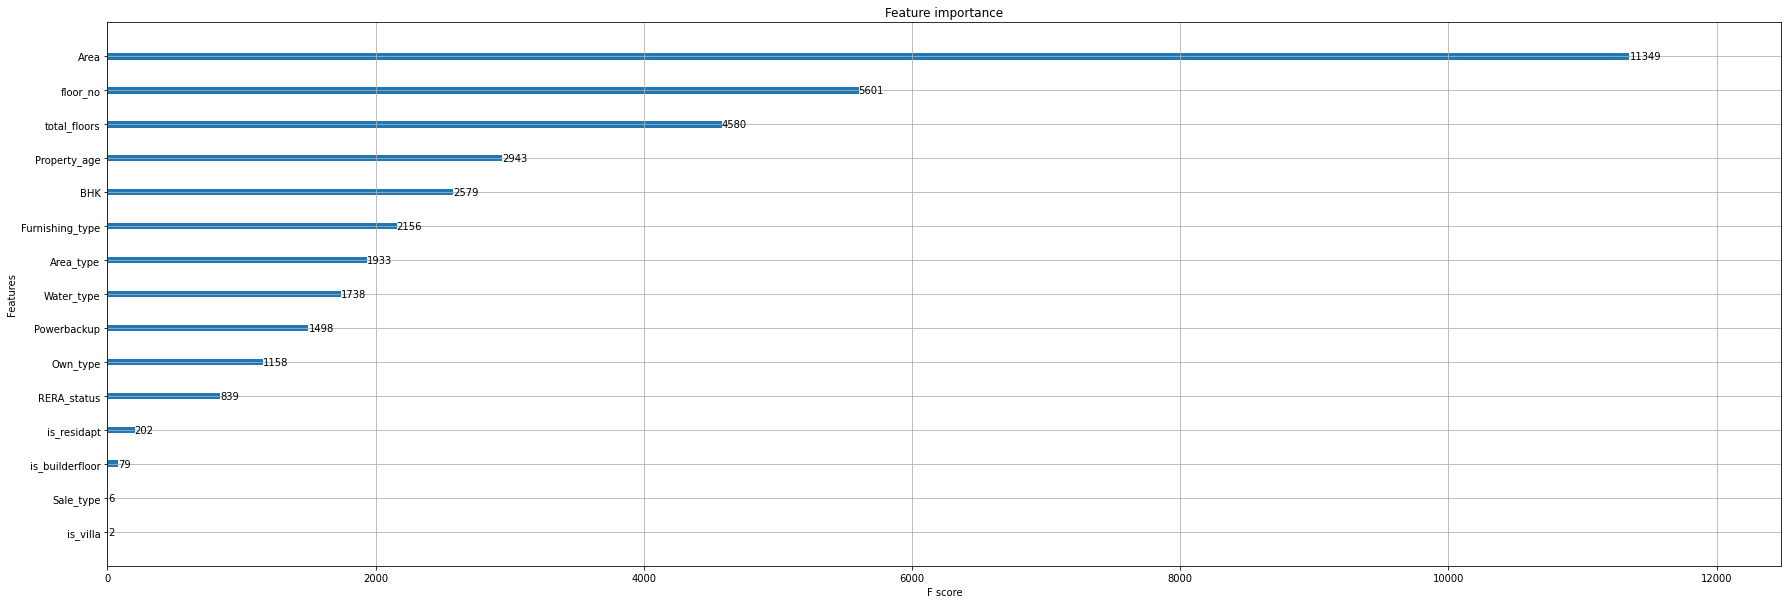

In [41]:
plot_features(model, (30,10))